In [331]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.ensemble as ske
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

# hodnocení modelů
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [332]:
# načtení souboru plachta.csv jako DataFrame
plachta_df = pd.read_csv ( "in/tables/PLACHTA.csv", encoding = 'utf-8')

In [333]:
# náhled dat
plachta_df.head()

,passengerId,orderID,driverId,DRIVER_ID,PASS2DRV_RATE,PASS2DRV_RATE_AVG,PASS2DRV_RATE_DEV,DRV2PASS_RATE,ETA,PASS_AVG_ETA,...,PASS_RIDE2ORDER,FREQUENCY,DAILY_LAST_RIDE,DAY_OF_LAST_RIDE,ACTIVE_PASS,HOME_REGION_ID,DRV_AVG_RATING,DRV_AVG_RATE_DEV,DRV_NUM_RIDES,DRV_KILL_RATE
0,9dc061cc45de5f8d722b009e15e092c59ed4b80b,c945ca8f64dd87e7514a54490c2c8eed730e83f6,4282769012eadaea355695fd23d9bc1ec9ef8171,399,5.0,5.0,1.0,5,900.0,427.14,...,0.59,0.19,1,1,0,6,4.85,1.030928,335,0.02
1,a27ee03968fa9581da403cc6d6fa866e31c13e0a,d313084b73ba1b891d74fa45a3ab01060d82a082,179b6e9ef3de7e14fdcbc169bfeb0773ad99f28e,135,5.0,5.0,1.0,5,60.0,210.00,...,0.67,0.05,0,6,0,9,4.90,1.020408,875,0.03
2,394e3da7dbf54451335224a5dbfd81cfda9a6f33,2f6f76e88fb785a688e50659f7e6c440f1670134,3b21fdde54c20074ebb5f23ac9efbab076de2e76,342,5.0,5.0,1.0,5,60.0,418.00,...,0.43,0.02,1,2,0,9,4.80,1.041667,827,0.01
3,cd65e55e4ada94ef3dc7e377353749484ea46695,0e64d4ab1b0c8b2c71fe0f90f7bedb7042e62704,1cde60c9febeb39b8e4f6114fb1f6e5bacd116e1,169,5.0,5.0,1.0,5,360.0,274.29,...,0.44,0.04,1,4,1,9,4.90,1.020408,327,0.02
4,560233e86e2e18dbc2a2fbc6a283403151d8db99,65a18d1b6473d229332bb2b569dd3237882a867d,99fb62ae3fc4c6598ef325bf8220471df5e79427,900,5.0,5.0,1.0,5,300.0,430.00,...,0.67,0.02,1,3,0,9,4.66,1.072961,281,0.02


In [334]:
plachta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32958 entries, 0 to 32957
Data columns (total 32 columns):
passengerId               32958 non-null object
orderID                   32958 non-null object
driverId                  32958 non-null object
DRIVER_ID                 32958 non-null int64
PASS2DRV_RATE             32958 non-null float64
PASS2DRV_RATE_AVG         32958 non-null float64
PASS2DRV_RATE_DEV         32958 non-null float64
DRV2PASS_RATE             32958 non-null int64
ETA                       32958 non-null float64
PASS_AVG_ETA              32958 non-null float64
ETA_DEV                   32958 non-null float64
rideDistance              32958 non-null int64
rideEstimateDistance      32958 non-null int64
DIFF_DISTANCE             32958 non-null int64
DIFF_DISTANCE_RATE        32958 non-null int64
DIFF_DISTANCE_EST2REAL    32958 non-null float64
DIFF_DISTANCE_POSITIVE    32958 non-null int64
TOTAL_DISTANCE            32958 non-null int64
PASS_LIFETIME             32

# Rozložení datasetu podle četnosti výsledného parametru

Abychom zjistily, jak kvalitní je dataset pro trénování modelů, uděláme si rychlý náhled na rozložení datasetu podle kategorie Active_pass: 1 = aktivní zákazník, 0 = zákazník, kterého firma ztratila.

V ideálním případě bychom měly mít tyto binární hodnoty rozložené co nejvíc "fifty-fifty", aby se model učil stejně často na datech s výsledkem "0" jako na datech s výsledkem "1".

In [335]:
plachta_df ['ACTIVE_PASS'].describe()

count    32958.000000
mean         0.628072
std          0.483327
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: ACTIVE_PASS, dtype: float64

Jak vidíme na základě zobrazených statistických charakteristik, a také v grafu níže, tak v našich datech je mírná převaha "jedniček". Pro firmu dobrá zpráva - většina zákazníků (62,8 %), jejichž chování za posledních 9 měsíců hodnotíme, je stále aktivních. Pro nás to ale znamená, že budeme muset být opatrné v průběhu učení modelů a nastavování jejich parametrů, abychom minimalizovaly případy, kdy by mohl být vzorek nesprávně vyhodnocen jako "1", i když je ve skutečnosti "0".

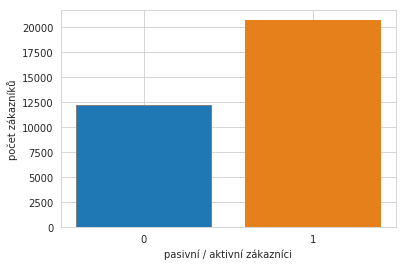

In [336]:
#vizualizace četnosti výsledného parametru v datasetu
churn_count = plachta_df.groupby('ACTIVE_PASS').count()
barlist = plt.bar (churn_count.index.values, churn_count['passengerId'], edgecolor='grey', tick_label=['0','1'], align='center')
colour=(0.9, 0.5, 0.1, 1.0)
plt.xlabel ('pasivní / aktivní zákazníci')
plt.ylabel ('počet zákazníků')
barlist[1].set_color(colour)
plt.show()

In [337]:
# vypuštění nepotřebných sloupců; unikátní Id nebudeme pro predikci potřebovat
plachta_df = plachta_df.drop(['passengerId','orderID','driverId'], axis=1)

# zaokrouhlení hodnot v datasetu na 4 desetinná místa
plachta_df = plachta_df.round(decimals=4)

In [338]:
#zobrazení základních statistických charakteristik pro jednotlivé proměnné datasetu
plachta_df.describe(include = 'all')

,DRIVER_ID,PASS2DRV_RATE,PASS2DRV_RATE_AVG,PASS2DRV_RATE_DEV,DRV2PASS_RATE,ETA,PASS_AVG_ETA,ETA_DEV,rideDistance,rideEstimateDistance,...,PASS_RIDE2ORDER,FREQUENCY,DAILY_LAST_RIDE,DAY_OF_LAST_RIDE,ACTIVE_PASS,HOME_REGION_ID,DRV_AVG_RATING,DRV_AVG_RATE_DEV,DRV_NUM_RIDES,DRV_KILL_RATE
count,32958.000000,32958.000000,32958.000000,32958.000000,32958.000000,32958.000000,32958.000000,32958.000000,32958.000000,32958.000000,...,32958.000000,32958.000000,32958.000000,32958.000000,32958.000000,32958.000000,32958.000000,32958.000000,32958.000000,32958.000000
mean,769.370987,4.910082,4.920786,0.997532,4.922932,431.918290,440.838683,0.980105,8975.551156,8105.041386,...,0.538533,0.290172,0.521785,4.356575,0.628072,7.283391,4.900273,1.004740,824.774501,0.024587
std,424.951797,0.343305,0.196532,0.060268,0.378851,257.631524,131.464717,0.494345,7468.481026,6446.603566,...,0.344963,0.840694,0.499533,1.836255,0.483327,3.100775,0.067791,0.078139,477.551904,0.014504
min,2.000000,1.000000,1.000000,0.204100,1.000000,0.500000,50.170000,0.001000,500.000000,0.000000,...,0.010000,0.010000,0.000000,1.000000,0.000000,1.000000,4.090000,0.200400,2.000000,0.000000
25%,401.000000,5.000000,4.930000,1.000000,5.000000,240.000000,348.000000,0.619425,4111.250000,3867.000000,...,0.310000,0.050000,0.000000,3.000000,0.000000,6.000000,4.870000,1.010100,440.000000,0.020000
50%,790.000000,5.000000,5.000000,1.000000,5.000000,360.000000,420.000000,0.901350,6977.500000,6492.000000,...,0.480000,0.080000,1.000000,5.000000,1.000000,9.000000,4.910000,1.016300,803.000000,0.020000
75%,1138.000000,5.000000,5.000000,1.000000,5.000000,540.000000,512.137500,1.258100,11521.000000,10570.750000,...,0.680000,0.180000,1.000000,6.000000,1.000000,9.000000,4.950000,1.024600,1163.000000,0.030000
max,1495.000000,5.000000,5.000000,1.945500,5.000000,6240.000000,1720.000000,13.218100,247209.000000,226110.000000,...,8.180000,38.500000,1.000000,7.000000,1.000000,11.000000,5.000000,1.222500,2290.000000,0.500000


# ANALÝZA PARAMETRŮ

V této části prozkoumáme rozložení dat podle jednotlivých parametrů a otestujeme jejich významnost. Na základě této analýzy si uděláme předvýběr vstupních proměnných (features), které později použijeme pro trénování našich modelů.

### DRIVER_ID aneb Vliv konkrétního řidiče

Je potřeba otestovat, zda je rozložení driver_id rovnoměrné, zda poslední jízdy nejezdí pouze určitý řidič. ID řidičů jsme původně dostaly v datovém typu řetězec. Pomocí číselníku jsme hodnoty převedly na praktičtější celá čísla a vytvořily nový sloupec DRIVER_ID. Výsledkem je sloupec s unikátními celočíselnými hodnotami v rozsahu 1 až 1495.

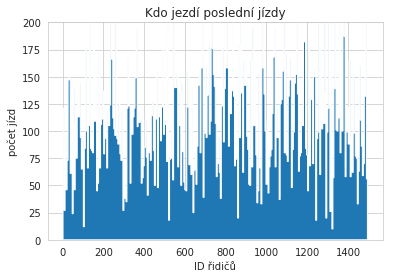

In [339]:
# Vizualizace proměnné DRIVER_ID pomocí histogramu
drived_id_s = pd.Series(plachta_df['DRIVER_ID'])
drived_id_s.hist(bins = 300, histtype = 'stepfilled')
plt.ylim((None, 200))  # nastavuje limit osi y
plt.title('Kdo jezdí poslední jízdy') # přidání nadpisu
plt.xlabel('ID řidičů') # přidání názvu os x a y
plt.ylabel('počet jízd')
plt.show()

Graf ukazuje určité rozdíly mezi počtem posledních jízd u jednotlivých řidičů, ale protože proměnná nabývá velkého množství unikátních hodnot a náš dataset je malý, tak by to naše testování v ML modelech spíše zkreslovalo. Proto do modelů použijeme raději proměnné DRV_KILL_RATE (ukazuje jakou část ze všech zákazníků řidiče tvoří neaktivní zákazníci) a DRV_AVG_RATING (průměrné hodnocení řidiče za posledních 100 jízd resp.), resp. DRV_AVG_RATE_DEV (odchylka v hodnocení poslední jízdy řidiče). Neukážeme tak na konkrétního řidiče, ale určíme, která skupina řidičů, vytvořená na základě ratingových proměnných, má potenciálně negativní vliv na loajalitu zákazníků.

In [340]:
# vypuštění sloupce DRIVER_ID
plachta_df = plachta_df.drop(['DRIVER_ID'], axis=1)

##  Jak zákazník hodnotil svou jízdu

### PASS2DRV_RATE
Parametr nám říká, jak hodnotil zákazník svou poslední jízdu. Zde bychom si rády otestovaly hypotézu, že zákazník odchází při špatném hodnocení poslední jízdy. Dle grafu se ukazuje, že zvolený parametr je stejně rozložen u aktivních i neaktivních zákazníků.

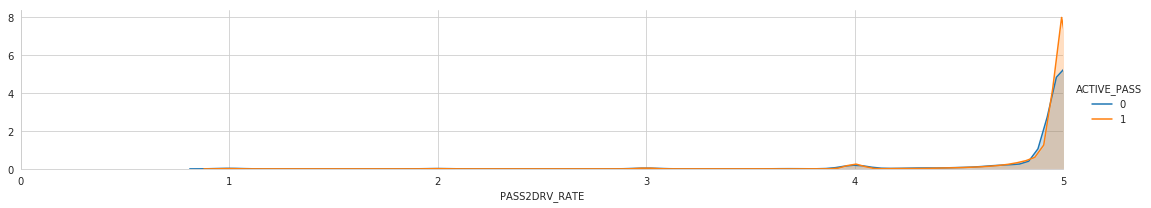

In [341]:
facet = sns.FacetGrid(plachta_df, hue="ACTIVE_PASS",aspect=5)
facet.map(sns.kdeplot,'PASS2DRV_RATE',shade= True)
facet.set(xlim=(0, plachta_df["PASS2DRV_RATE"].max()))
facet.add_legend()

### PASS2DRV_RATE_DEV
Parametr je stanoven na základě podílu hodnocení zákazníka po jeho zatím poslední jízdě k průměrnému hodnocení za všechny jeho jízdy. Pokud je daný parametr větší než 1, tak byl zákazník při poslední jízdě více spokojený než průměrně v minulosti. Zde bychom si rády otestovaly hypotézu, že zákazník odchází při špatném hodnocení poslední jízdy. Graf ukazuje, že zvolený parametr je rovnoměrně rozložen u aktivních i neaktivních zákazníků.

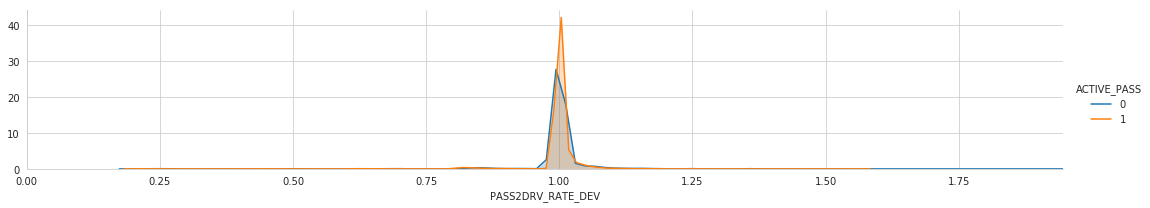

In [342]:
facet = sns.FacetGrid(plachta_df, hue="ACTIVE_PASS",aspect=5)
facet.map(sns.kdeplot,'PASS2DRV_RATE_DEV',shade= True)
facet.set(xlim=(0, plachta_df["PASS2DRV_RATE_DEV"].max()))
facet.add_legend()

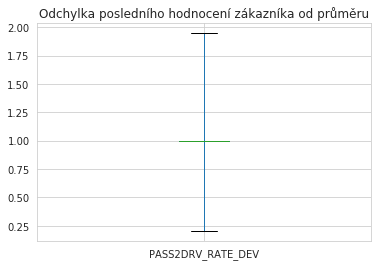

In [343]:
#jiná vizualizace proměnné PASS2DRV_RATE_DEV
plachta_df["PASS2DRV_RATE_DEV"].plot(kind='box', whis='range')
plt.title('Odchylka posledního hodnocení zákazníka od průměru')
plt.show()

Je vidět, že hodnoty proměnné mají velký rozptyl a koncentrují se kolem hodnoty 1, což znamená, že zákazníci hodnotili svou poslední jízdu stejně nebo velmi podobně jako své předchozí (ani hůře, ani lépe). Nicméně, jednou z našich hypotéz je, že to, jak zákazník ohodnotil řidiče své poslední jízdy může mít vliv na jeho odchod, a proto proměnnou PASS2DRV_RATE_DEV zařadíme do testování v ML modelech.

### ETA_DEV aneb Délka čekání na taxi

Parametr je stanoven na základě podílu dojezdové doby u zákazníkovy poslední jízdy k průměrné dojezdové době z minulých jízd zákazníka. Pokud je daný parametr větší než 1, musel zákazník na řidiče čekat déle než průměrně čekával v minulosti. Hypotéza u tohoto parametru zní, že zákazníky může odradit delší doba dojezdu taxi služby než na jakou byl doposud zvyklý.

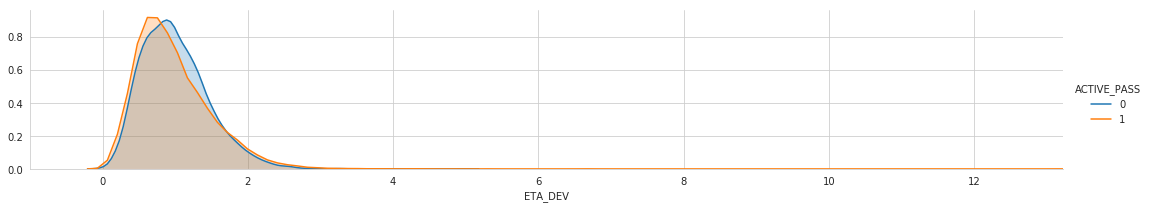

In [344]:
facet = sns.FacetGrid(plachta_df, hue="ACTIVE_PASS",aspect=5)
facet.map(sns.kdeplot,'ETA_DEV',shade= True)
facet.set(xlim= (-1, plachta_df["ETA_DEV"].max()))
facet.add_legend()

Z grafu vidíme, že malý rozdíl podle proměnné ve skupině aktvních vs. odešlých zákazníků. Vidíme, ale také velké množství extrémních hodnot ve posledním kvartilu našeho datasetu. Proto před vložením proměnné do ML modelu data od těchto extrémů vyčistíme tak, že je nahradíme průměrem.

In [345]:
plachta_df ['ETA_DEV'].describe()

count    32958.000000
mean         0.980105
std          0.494345
min          0.001000
25%          0.619425
50%          0.901350
75%          1.258100
max         13.218100
Name: ETA_DEV, dtype: float64

In [346]:
#Nahrazeni tkzv. outliers průměrnou hodnotou

# výpočet průměru
mean = plachta_df.loc[plachta_df['ETA_DEV'] <= 3.25, 'ETA_DEV'].mean()
# dropnutí všech hodnot > 3.25, and jejich nahrazení průměrnou hodnotou v datasetu
plachta_df.loc[plachta_df.ETA_DEV> 3.25, 'ETA_DEV'] = np.nan
plachta_df.fillna(mean,inplace=True)

# Nové hodnoty ETA DEV po oprave outliers
plachta_df ['ETA_DEV'].describe()

count    32958.000000
mean         0.976956
std          0.481055
min          0.001000
25%          0.619425
50%          0.901350
75%          1.255800
max          3.245400
Name: ETA_DEV, dtype: float64

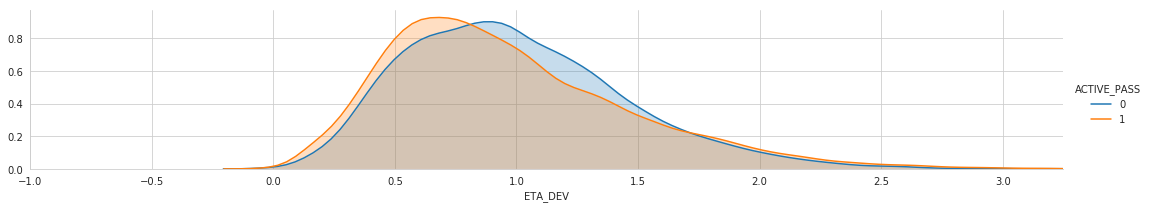

In [347]:
#Vizualizace proměnné po úpravě extrémních hodnot
facet = sns.FacetGrid(plachta_df, hue="ACTIVE_PASS",aspect=5)
facet.map(sns.kdeplot,'ETA_DEV',shade= True)
facet.set(xlim= (-1, plachta_df["ETA_DEV"].max()))
facet.add_legend()

In [348]:
#Úprava pro případ, že budeme chtít do modelu zahrnout také průměrný dojezdový čas konkrétního zákazníka:
#PASS_AVG_ETA - zobrazení původních hodnot proměnné
plachta_df ['PASS_AVG_ETA'].describe()

count    32958.000000
mean       440.838683
std        131.464717
min         50.170000
25%        348.000000
50%        420.000000
75%        512.137500
max       1720.000000
Name: PASS_AVG_ETA, dtype: float64

In [349]:
#PASS_AVG_ETA - nahrazeni tkzv. outliers průměrnou hodnotou

# výpočet průměru
mean = plachta_df.loc[plachta_df['PASS_AVG_ETA'] <=1100, 'PASS_AVG_ETA'].mean()
# dropnutí všech hodnot > 1100, and jejich nahrazení průměrnou hodnotou v datasetu
plachta_df.loc[plachta_df.PASS_AVG_ETA> 1100, 'PASS_AVG_ETA'] = np.nan
plachta_df.fillna(mean,inplace=True)

# Zobrazení nových hodnot proměnné PASS_AVG_ETA po oprave outliers
plachta_df ['PASS_AVG_ETA'].describe()

count    32958.000000
mean       440.212959
std        129.489568
min         50.170000
25%        348.000000
50%        420.000000
75%        511.592500
max       1100.000000
Name: PASS_AVG_ETA, dtype: float64

## VZDÁLENOST JÍZDY

Záznamy o jízdách, které jsme dostaly, obsahovaly údaje o odhadované vzdálenosti (byla zákazníkovi nabídnuta před jízdou na základě výběru startu a cíle cesty) a údaje o skutečně ujeté vzdálenosti. V SQL jsme si na základě těchto dvou proměnných vytvořily několik sloupců, které se chystáme prozkoumat a rozhodnout, kterou charakteristiku nakonec použijeme jako vstupní feature pro naše statistické modely.

### RideDistance aneb Ujetá vzdálenost

In [350]:
#rideDistance - přehled rozložení hodnot 
plachta_df ['rideDistance'].describe()

count     32958.000000
mean       8975.551156
std        7468.481026
min         500.000000
25%        4111.250000
50%        6977.500000
75%       11521.000000
max      247209.000000
Name: rideDistance, dtype: float64

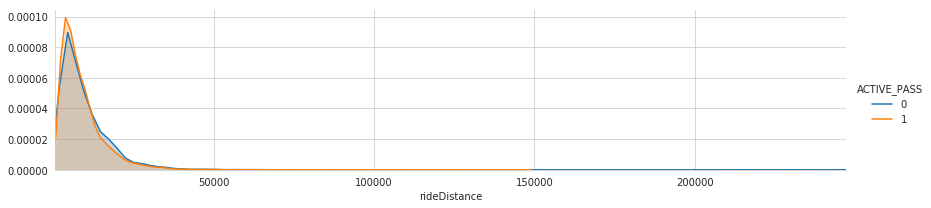

In [351]:
#rideDistance 
facet = sns.FacetGrid(plachta_df, hue="ACTIVE_PASS", height=3, aspect=4)
facet.map(sns.kdeplot,'rideDistance',shade= True)
facet.set(xlim=(500, plachta_df['rideDistance'].max()))
facet.add_legend()

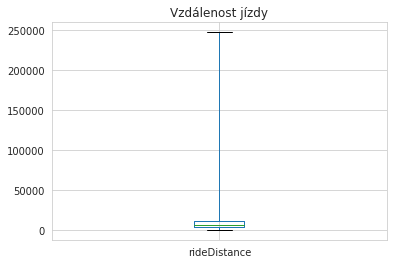

In [352]:
#rideDistance 
plachta_df['rideDistance'].plot(kind='box', whis='range')
plt.title('Vzdálenost jízdy')
plt.show()

Už podle prvního statistického náhledu, je vidět, že data jsou silně koncentrovaná k nižším hodnotám (jízdy na kratší vzdálenosti) se střední hodnotou 6,9 km. V horní polovině datasetu nabývají hodnoty velký rozptyl a končí na stovkách kilometrů. S takovými daty nebude lehké pracovat a tak zkusíme raději jinou variantu výpočtu vzdálenosti (jinou proměnnou).

### DIFF_DISTANCE_RATE

Tato proměnná říká kolikanásobně překročila ujetá vzdálenost odhadovanou. Nabývá hodnot 1, 2, 3 atd. Tedy pokud odhad vzdálenosti byl stený jako později skutečně ujetá vzdálenost, nabývá proměnná hodnotu 1.    V případě, že údaj o odhadované vzdálenosti nemáme (protože zákazník nezadal cíl, když jízdu poptával), je hodnota proměnné 0.

In [353]:
#DIFF_DISTANCE_RATE - přehled rozložení hodnot 
plachta_df ['DIFF_DISTANCE_RATE'].describe()

count    32958.000000
mean         0.636993
std          0.777349
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         53.000000
Name: DIFF_DISTANCE_RATE, dtype: float64

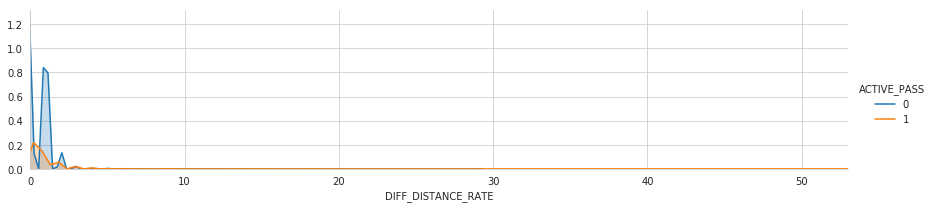

In [354]:
#Vizualizace hodnot proměnné DIFF_DISTANCE_RATE
facet = sns.FacetGrid(plachta_df, hue="ACTIVE_PASS", height=3, aspect=4)
facet.map(sns.kdeplot,'DIFF_DISTANCE_RATE',shade= True)
facet.set(xlim=(0, plachta_df['DIFF_DISTANCE_RATE'].max()))
facet.add_legend()

Vidíme, že s takovými hodnotami proměnné by bylo nesmyslné pracovat a tak odstraníme extrémy. Předpokládáme, že trasa jízd, které překročily odhadovanou vzdálenost víc než 4-násobně byla pravděpodobně aktualizována zákazníkem v průběhu jízdy a nebyla způsobena tím, že by řidič musel cestu prodlužovat například objížďkou kvůli dopravní situaci. Proto tyto výjimečné hodnoty nahradíme průměrem datasetu, aby nám později predikci nezkreslovaly.

In [355]:
#DIFF_DISTANCE_RATE - nahrazeni tkzv. outliers prumerem

# určení průměrné hodnoty
mean = plachta_df.loc[plachta_df['DIFF_DISTANCE_RATE'] <= 4, 'DIFF_DISTANCE_RATE'].mean()

# vypuštění všech hodnot > 4, and jejich nahrazení průměrnou hodnotou v datasetu
plachta_df.loc[plachta_df.DIFF_DISTANCE_RATE > 4, 'DIFF_DISTANCE_RATE'] = np.nan
plachta_df.fillna(mean,inplace=True)

#přehled rozložení hodnot po opravě outliers
plachta_df ['DIFF_DISTANCE_RATE'].describe()

count    32958.000000
mean         0.620005
std          0.620594
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: DIFF_DISTANCE_RATE, dtype: float64

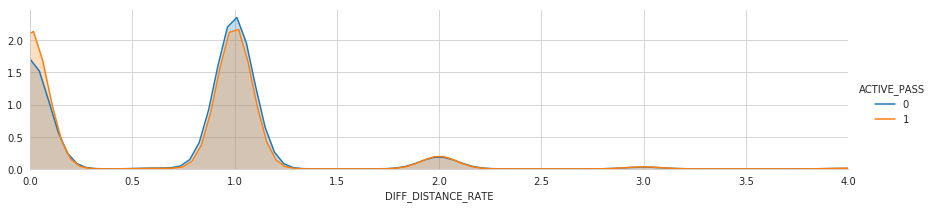

In [356]:
#DIFF_DISTANCE_RATE - graf s novými hodnotami proměnné
facet = sns.FacetGrid(plachta_df, hue="ACTIVE_PASS", height=3, aspect=4)
facet.map(sns.kdeplot,'DIFF_DISTANCE_RATE',shade= True)
facet.set(xlim=(0, plachta_df['DIFF_DISTANCE_RATE'].max()))
facet.add_legend()

### DIFF_DISTANCE_EST2REAL

Tato proměnná vyjadřuje podil odhadované vzdálenosti ke skutečné. Pokud odhad chyběl, tak hodnota = 1.

In [357]:
#Přehled rozložení hodnot proměnné
plachta_df ['DIFF_DISTANCE_EST2REAL'].describe()

count    32958.000000
mean         0.973176
std          0.398010
min          0.020000
25%          0.910000
50%          0.990000
75%          1.020000
max         29.110000
Name: DIFF_DISTANCE_EST2REAL, dtype: float64

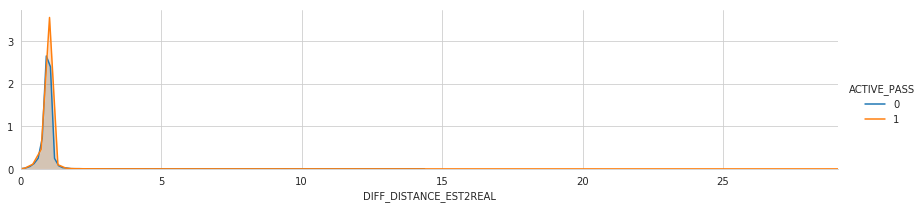

In [358]:
#Vizualizace četnosti hodnot proměnné DIFF_DISTANCE_EST2REAL
facet = sns.FacetGrid(plachta_df, hue="ACTIVE_PASS", height=3, aspect=4)
facet.map(sns.kdeplot,'DIFF_DISTANCE_EST2REAL',shade= True)
facet.set(xlim=(0, plachta_df['DIFF_DISTANCE_EST2REAL'].max()))
facet.add_legend()

In [359]:
#DIFF_DISTANCE_EST2REAL - nahrazení tkzv. outliers průměrem

# určení průměrné hodnoty
mean = plachta_df.loc[plachta_df['DIFF_DISTANCE_EST2REAL'] <= 4, 'DIFF_DISTANCE_EST2REAL'].mean()

# vypuštění všech hodnot > 4 a jejich nahrazení průměrnou hodnotou v datasetu
plachta_df.loc[plachta_df.DIFF_DISTANCE_EST2REAL > 4, 'DIFF_DISTANCE_EST2REAL'] = np.nan
plachta_df.fillna(mean,inplace=True)

#přehled rozložení hodnot po opravě outliers
plachta_df ['DIFF_DISTANCE_EST2REAL'].describe()

count    32958.000000
mean         0.961783
std          0.190815
min          0.020000
25%          0.910000
50%          0.990000
75%          1.020000
max          4.000000
Name: DIFF_DISTANCE_EST2REAL, dtype: float64

### DIFF_DISTANCE_POSITIVE

Proměnná DIFF_DISTANCE_POSITIVE rozděluje data do 3 kategorií podle toho, jestli zákazník ujel delší vzdálenost než byla ta odhadovaná před začátkem jízdy (hodnota=1) anebo jestli byla ujetá vzdálenost nižší než původní odhadovaná (hodnota=0). Pro hodnoty této proměnné není podstatné, o kolik se vzdálenosti lišily. V případě, že zákazník při poptávce nezadal cíl a vzdálenost nemohla být nabídnuta, nabývá proměnná hodnotu 2. Předpokládáme, že zákazník s výsledkem 0 odchází spíše spokojen (pokud ujetou vzdálenost zaměníme za cenu jízdy a víme, že 0 znamená, že skutečná vzdálenost byla nižší než očekávaná).

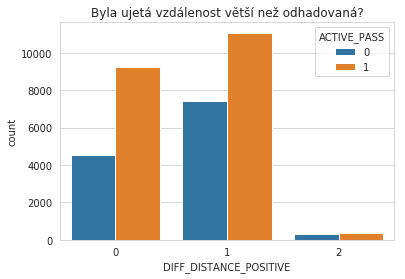

In [360]:
sns.countplot(x='DIFF_DISTANCE_POSITIVE', hue='ACTIVE_PASS', data=plachta_df)
plt.title('Byla ujetá vzdálenost větší než odhadovaná?')
plt.show()

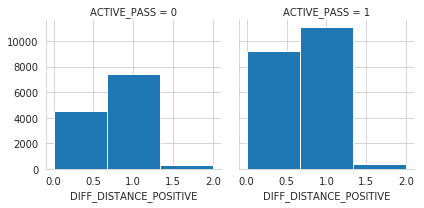

In [361]:
g = sns.FacetGrid(plachta_df, col='ACTIVE_PASS')
g.map(plt.hist, 'DIFF_DISTANCE_POSITIVE', bins=3)

Z grafů vidíme, že v případě odešlých zákazníků (active_pass = 0), je mezi hodnotami proměnné 0 a 1 výrazně větší rozdíl než ve skupině aktivních zákazníků. Tato proměnná by mohla mít vliv na churn zákazníků a proto ji zařadíme mezi vstupní proměnné pro trénování modelů.

### LAST_RIDE_DISTANCE_DEV

Proměnná vyjadřující o kolik se lišila ujetá vzdálenost poslední jízdy zákazníka od průměrné vzdálenosti všech jeho jízd (podíl).

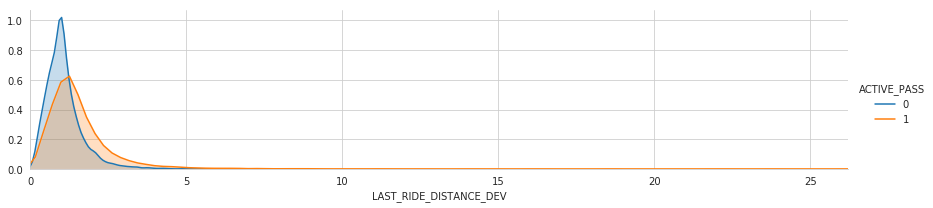

In [362]:
# LAST_RIDE_DISTANCE_DEV - podíl vzdálenosti poslední jízdy zákazníka ke vzdálenosti jeho průměrné jízdy
facet = sns.FacetGrid(plachta_df, hue="ACTIVE_PASS", height=3, aspect=4)
facet.map(sns.kdeplot,'LAST_RIDE_DISTANCE_DEV',shade= True)
facet.set(xlim=(0, plachta_df['LAST_RIDE_DISTANCE_DEV'].max()))
facet.add_legend()

Tato proměnná si také žádá očištění od extrémů.

In [363]:
#Přehled rozložení hodnot proměnné
plachta_df ['LAST_RIDE_DISTANCE_DEV'].describe()

count    32958.000000
mean         1.368767
std          0.958776
min          0.030000
25%          0.830000
50%          1.170000
75%          1.650000
max         26.210000
Name: LAST_RIDE_DISTANCE_DEV, dtype: float64

In [364]:
#LAST_RIDE_DISTANCE_DEV - nahrazeni tkzv. outliers prumerem

# určení průměrné hodnoty
mean = plachta_df.loc[plachta_df['LAST_RIDE_DISTANCE_DEV'] <= 7, 'LAST_RIDE_DISTANCE_DEV'].mean()

# dropnutí všech hodnot > 7 a jejich nahrazení průměrnou hodnotou v datasetu
plachta_df.loc[plachta_df.LAST_RIDE_DISTANCE_DEV > 7, 'LAST_RIDE_DISTANCE_DEV'] = np.nan
plachta_df.fillna(mean,inplace=True)

#přehled rozložení hodnot po opravě outliers
plachta_df ['LAST_RIDE_DISTANCE_DEV'].describe()

count    32958.000000
mean         1.345354
std          0.823829
min          0.030000
25%          0.830000
50%          1.170000
75%          1.640000
max          6.970000
Name: LAST_RIDE_DISTANCE_DEV, dtype: float64

## DEN A ČAS POSLEDNÍ JÍZDY

### DAILY_LAST_RIDE aneb Noční nebo denní jízda

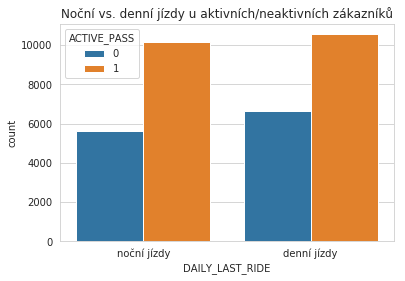

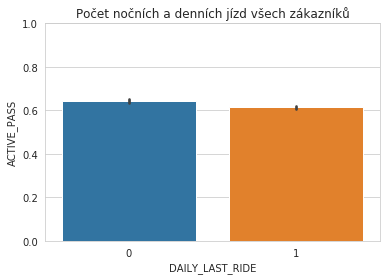

In [365]:
# Denní jízda = 1
# Noční jízda = 0
sns.countplot(x='DAILY_LAST_RIDE', hue='ACTIVE_PASS', data=plachta_df)
column_names = ['noční jízdy', 'denní jízdy'] # přejmenování sloupců
plt.xticks(tick_marks, column_names)
plt.title('Noční vs. denní jízdy u aktivních/neaktivních zákazníků')
plt.show()

sns.barplot(x='DAILY_LAST_RIDE', y='ACTIVE_PASS', data=plachta_df)
plt.title('Počet nočních a denních jízd všech zákazníků')
plt.ylim (None, 1)
plt.show()

### DAY_OF_LAST_RIDE aneb Který den v týdnu se uskutečnila jízda

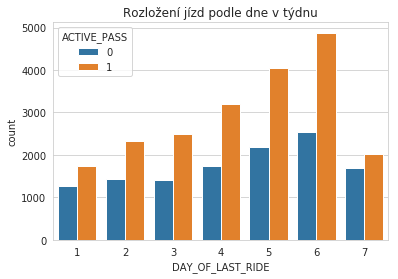

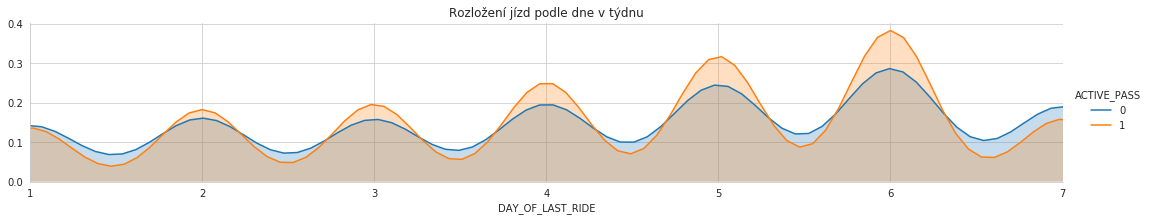

In [366]:
sns.countplot(x='DAY_OF_LAST_RIDE', hue='ACTIVE_PASS', data=plachta_df)
plt.title('Rozložení jízd podle dne v týdnu')
plt.show()

facet = sns.FacetGrid(plachta_df, hue="ACTIVE_PASS",aspect=5)
facet.map(sns.kdeplot,'DAY_OF_LAST_RIDE',shade= True)
facet.set(xlim= (1,7))
plt.title('Rozložení jízd podle dne v týdnu')
facet.add_legend()

## PASS_LIFETIME aneb Po jaké době odcházejí zákazníci nejčastěji?

In [367]:
# Jednotkou proměnné je den.
plachta_df ['PASS_LIFETIME'].describe()

count    32958.000000
mean       152.772316
std         86.385969
min          0.000000
25%         77.000000
50%        168.000000
75%        230.000000
max        277.000000
Name: PASS_LIFETIME, dtype: float64

Z grafů vidíme, že nejvíc zákazníků odchází v prvních 2 měsících, potom je stabilní a nakonec klesá (analyzovaly jsme pouze údaje za 9 měsíců). Tato proměnná je rozhodně zajímavá a do ML testování ji zařadíme. 

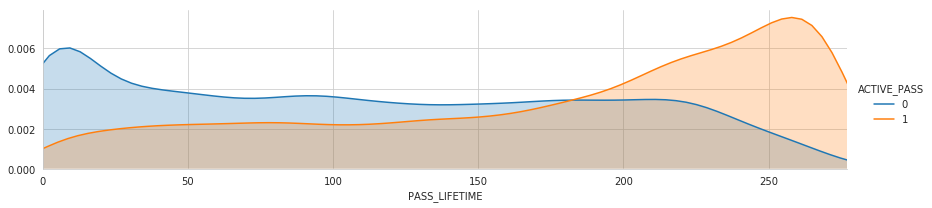

In [368]:
# Po jaké době odchází zákazníci nejčastěji (jednotky: dny)?
facet = sns.FacetGrid(plachta_df, hue="ACTIVE_PASS",aspect=4)
facet.map(sns.kdeplot,'PASS_LIFETIME',shade= True)
facet.set(xlim=(0, plachta_df['PASS_LIFETIME'].max()))
facet.add_legend()

# PREDIKCE A MACHINE LEARNING

## DECISION TREE MODEL

In [369]:
# Náhled datasetu
plachta_df.head()

,PASS2DRV_RATE,PASS2DRV_RATE_AVG,PASS2DRV_RATE_DEV,DRV2PASS_RATE,ETA,PASS_AVG_ETA,ETA_DEV,rideDistance,rideEstimateDistance,DIFF_DISTANCE,...,PASS_RIDE2ORDER,FREQUENCY,DAILY_LAST_RIDE,DAY_OF_LAST_RIDE,ACTIVE_PASS,HOME_REGION_ID,DRV_AVG_RATING,DRV_AVG_RATE_DEV,DRV_NUM_RIDES,DRV_KILL_RATE
0,5.0,5.0,1.0,5,900.0,427.14,2.1070,4584,4321,263,...,0.59,0.19,1,1,0,6,4.85,1.0309,335,0.02
1,5.0,5.0,1.0,5,60.0,210.00,0.2857,9547,8871,676,...,0.67,0.05,0,6,0,9,4.90,1.0204,875,0.03
2,5.0,5.0,1.0,5,60.0,418.00,0.1435,7697,8874,-1177,...,0.43,0.02,1,2,0,9,4.80,1.0417,827,0.01
3,5.0,5.0,1.0,5,360.0,274.29,1.3125,5118,5245,-127,...,0.44,0.04,1,4,1,9,4.90,1.0204,327,0.02
4,5.0,5.0,1.0,5,300.0,430.00,0.6977,746,675,71,...,0.67,0.02,1,3,0,9,4.66,1.0730,281,0.02


In [370]:
# Základní info o data setu, abychom měly přehled co za parametry v něm jsou, neboť ne všechny využijeme pro modely
plachta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32958 entries, 0 to 32957
Data columns (total 28 columns):
PASS2DRV_RATE             32958 non-null float64
PASS2DRV_RATE_AVG         32958 non-null float64
PASS2DRV_RATE_DEV         32958 non-null float64
DRV2PASS_RATE             32958 non-null int64
ETA                       32958 non-null float64
PASS_AVG_ETA              32958 non-null float64
ETA_DEV                   32958 non-null float64
rideDistance              32958 non-null int64
rideEstimateDistance      32958 non-null int64
DIFF_DISTANCE             32958 non-null int64
DIFF_DISTANCE_RATE        32958 non-null float64
DIFF_DISTANCE_EST2REAL    32958 non-null float64
DIFF_DISTANCE_POSITIVE    32958 non-null int64
TOTAL_DISTANCE            32958 non-null int64
PASS_LIFETIME             32958 non-null int64
AVG_RIDE_DISTANCE         32958 non-null int64
LAST_RIDE_DISTANCE_DEV    32958 non-null float64
PASS_NUM_RIDES            32958 non-null int64
PASS_RIDE2ORDER           3

In [371]:
# rozdělení data setu na features a target
features = ['PASS2DRV_RATE_DEV', 'ETA_DEV', 'PASS_AVG_ETA', 'DIFF_DISTANCE_EST2REAL', 'TOTAL_DISTANCE', 'DIFF_DISTANCE_POSITIVE',
            'PASS_LIFETIME','LAST_RIDE_DISTANCE_DEV', 'PASS_NUM_RIDES', 'PASS_RIDE2ORDER', 'FREQUENCY', 'DAILY_LAST_RIDE' ,
            'DAY_OF_LAST_RIDE', 'HOME_REGION_ID', 'DRV_AVG_RATE_DEV', 'DRV_KILL_RATE']
target = ['ACTIVE_PASS']
# Features
X = plachta_df[features] 
# Target 
y = plachta_df[target] 

In [372]:
# náhled vybraných features
X.head()

,PASS2DRV_RATE_DEV,ETA_DEV,PASS_AVG_ETA,DIFF_DISTANCE_EST2REAL,TOTAL_DISTANCE,DIFF_DISTANCE_POSITIVE,PASS_LIFETIME,LAST_RIDE_DISTANCE_DEV,PASS_NUM_RIDES,PASS_RIDE2ORDER,FREQUENCY,DAILY_LAST_RIDE,DAY_OF_LAST_RIDE,HOME_REGION_ID,DRV_AVG_RATE_DEV,DRV_KILL_RATE
0,1.0,2.1070,427.14,0.94,207924,1,222,0.93,42,0.59,0.19,1,1,6,1.0309,0.02
1,1.0,0.2857,210.00,0.93,37728,1,85,1.01,4,0.67,0.05,0,6,9,1.0204,0.03
2,1.0,0.1435,418.00,1.15,74234,0,140,0.31,3,0.43,0.02,1,2,9,1.0417,0.01
3,1.0,1.3125,274.29,1.02,119337,0,182,0.30,7,0.44,0.04,1,4,9,1.0204,0.02
4,1.0,0.6977,430.00,0.90,14420,1,259,0.31,6,0.67,0.02,1,3,9,1.0730,0.02


In [373]:
# náhled targetu, který určuje zda zákazník odešel (0) nebo je stále aktivní(1)
y.head()

,ACTIVE_PASS
0,0
1,0
2,0
3,1
4,0


In [374]:
# Rozdělení data setu na trénovací a testovací data set  
# 70 % trénovací data set a 30 % testovací data set. Rozdělení data setu na základně náhodného výběru (random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) 

In [375]:
# Stavění Decision Tree modelu

# Vytvoření Decision Tree Classifer objektu
clf_dt = DecisionTreeClassifier()

# Trénování modelu
clf_dt = clf_dt.fit(X_train,y_train)

# Predikce targetu na testovacích datech
y_pred_dt = clf_dt.predict(X_test)

Oproti Hackathonu jsme přistoupily i k ohodnocení výsledné predikce modelu a to pomocí 2 metod matrix: conflusion a accuracy score.

Matrix confusion se používá ke stanovení vlastností a kvality klasifikátoru (modelu). Základem matice je počet správných a nesprávných predikcí. Z confusion matrix vyplývá, že náš model lépe predikuje, že zákazník zůstane než že odejde, což je dáno nerovnoměrným zastoupení aktivních a neaktivních zákazníků v datasetu. Aby model lépe predikoval výsledný stav, bylo by vhodné dataset očistit tak, aby rozdělení výskytů bylo rovnocenné. My jsme k tomuto kroku nepřikročily, protože už tak jsme se potýkaly s malým počtem dat. Menší množství dat při tolika parametrech by oslabilo predikční schopnost modelu. 

Text(0.5, 15.0, 'Predikovaná hodnota výsledné proměnné')

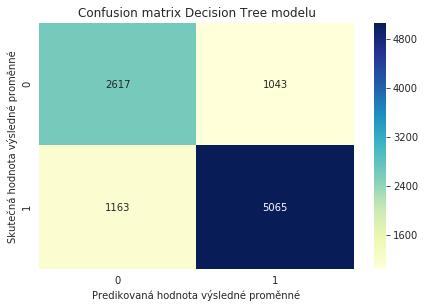

In [376]:
# hodnocení modelu Decision Tree pomocí confusion matrix
cnf_matrix_dt = metrics.confusion_matrix(y_test, y_pred_dt)
cnf_matrix_dt

# nastavení grafického zobrazení matice
class_names=[0,1] # názvy polí
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_dt), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree modelu', y=1.1)
plt.ylabel('Skutečná hodnota výsledné proměnné')
plt.xlabel('Predikovaná hodnota výsledné proměnné')

Accuracy score jsme spočítaly pomocí funkce accuracy_score z knihovny Sklearn. Funguje na principu, že pokud je celý predikovaný target totožný s testovacím targetem (jinak řečeno model správně predikoval target), tak accuracy score je 1. Náš Decision Tree má accuracy score 0,7739.

In [377]:
# Hodnocení modelu pomocí accuracy score
accuracy_score_dt = metrics.accuracy_score(y_test, y_pred_dt)
print("Accuracy score Decision Tree modelu je:", accuracy_score_dt)

Accuracy score Decision Tree modelu je: 0.7769012944983819


0.01 PASS2DRV_RATE_DEV
0.052 ETA_DEV
0.055 PASS_AVG_ETA
0.042 DIFF_DISTANCE_EST2REAL
0.079 TOTAL_DISTANCE
0.004 DIFF_DISTANCE_POSITIVE
0.067 PASS_LIFETIME
0.097 LAST_RIDE_DISTANCE_DEV
0.378 PASS_NUM_RIDES
0.097 PASS_RIDE2ORDER
0.021 FREQUENCY
0.009 DAILY_LAST_RIDE
0.019 DAY_OF_LAST_RIDE
0.01 HOME_REGION_ID
0.041 DRV_AVG_RATE_DEV
0.019 DRV_KILL_RATE


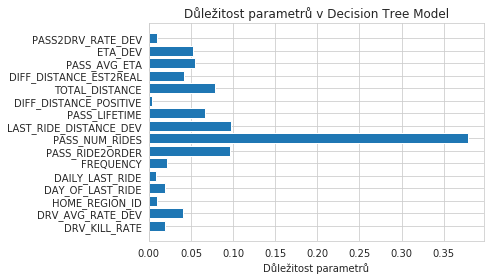

In [378]:
# Cílem našeho projektu je zjistit parametry, která rozhodují o tom, zda zákazník odejde. Proto nás zajímá i důležitost 
# parametrů v Decision Tree Modelu.
feature_importances_dt= clf_dt.feature_importances_
[print(round (feature_importances_dt[i],3), features[i]) for i in range(0,len(features))]

# Grafické znázornění parametrů
plt.barh ( features, clf_dt.feature_importances_)
plt.xticks()
plt.xlabel('Důležitost parametrů')
plt.title('Důležitost parametrů v Decision Tree Model')
plt.gca().invert_yaxis()

Vidíme, že největší váhu má parametr PASS_NUM_RIDES 0,38, a hned po něm LAST_RIDE_DISTANCE_DEV 0,10 a PASS_RIDE2ORDER oba s váhou.

## RANDOM FOREST

Random Forest odstraňuje určité nedostatky Decision Tree. Má dobré predikční vlastnosti, jedná se o relativně pochopitelný model a zároveň je stále vhodný pro náš cíl projektu. I tento model má své slabé stránky, které jsme se v průběhu testování snažily minimalizovat. Pokud se špatně nastaví hloubka stromu, může se model přeučit/přetrénovat (naučí se i velmi nepravidelné vzory). Tomu jsme se snažily předejít správným nastavením parametrů modelu. Nejprve jsme vyzkoušely Random Forest bez úpravy defaultně nastavených parametrů, abychom měly později srovnání. 

In [379]:
# Defaultní Random Forest

clf_nofit=RandomForestClassifier(n_estimators=100)
clf_nofit.fit(X_train,np.ravel(y_train))
y_pred_nofit=clf_nofit.predict(X_test)
nofitrf_accuracy_score = metrics.accuracy_score(y_test, y_pred_nofit)
print("Accuracy score u defaultně nastaveného Random Forest:",metrics.accuracy_score(y_test, y_pred_nofit))

Accuracy score u defaultně nastaveného Random Forest: 0.8307038834951457


Pro lepší práci s Random Forest jsme si dále nastavily parametr random_state, jimž se určuje semínko (seed) používané při incializaci generátorem náhodných čísel. Díky tomu bude generátor vracet stále stejnou sekvenci pseudonáhodných dat i při dalších opakováních testu. 

Potom jsme manuálně nastavily čtyři parametry: 1) max_features: kolik features model použije v jednotlivých stromech, 2) n_estimators: počet stromů 3) min_sample_leaf: počet minimálního vzorku neboli velikost listu stromu 4) max_depth: hloubku každého stromu, tedy počet uzlů).

In [380]:
# data set máme už rozdělený na trénovací a testovací data set z Decision Tree Model (viz výše)

# random seed (semínko)
seed = 2019

# Stavění Random Forest modelu
# nastavování parametrů
params = {'random_state': seed,
          'max_features': 'auto', 
          'min_samples_leaf': 50, # zabrání přeučení modelu kvůli přílišnému rozvětvení stromu
          'n_estimators': 125, # počet stromů         
          'max_depth': 5} # hloubka stromu
clf_rf = RandomForestClassifier()
clf_rf.set_params(**params) # rozloží parametry

# Trénování modelu na trénovacím data setu. 
# úprava y_train na vektor pomocí ravel z nunpy
clf_rf.fit(X_train, np.ravel(y_train))  # ravel - převod na vektor

# Predikce targetu na testovacím data setu
y_pred_rf = clf_rf.predict(X_test)

Jak dobrý je náš model Random Forest, zjistíme na základě hodnocení podle: 1) confusion matrix 2) ROC curve 3) accuracy score.

Text(0.5, 15.0, 'Predikovaná hodnota výsledné proměnné')

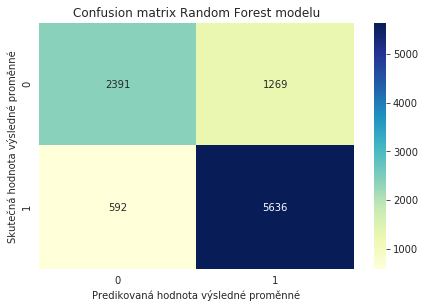

In [381]:
# Confusion matrix modelu Random Forest
cnf_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)

class_names=[0,1] # název polí
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix Random Forest modelu', y=1.1)
plt.ylabel('Skutečná hodnota výsledné proměnné')
plt.xlabel('Predikovaná hodnota výsledné proměnné')

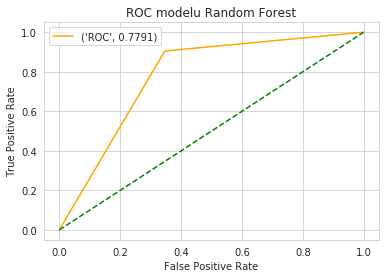

In [382]:
# ROC = Receiver operating characteristic 
roc_auc_rf = round (roc_auc_score(y_test, y_pred_rf),4)

# funkce na vytváření ROC grafu
def plot_roc_curve(fpr, tpr):   
    plt.plot(fpr, tpr, color='orange', label = ('ROC', roc_auc_rf))
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate') #pravděpodobnost s jakou bude jako aktivní zákazník vyhodnocen zákazník, který odejde.
    plt.ylabel('True Positive Rate') #pravděpodobnost s jakou bude jako aktivní zákazník vyhodnocen zákazník, který odejde
    plt.title('ROC modelu Random Forest')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)  
plot_roc_curve(fpr, tpr)


ROC křivka Na svislé ose grafu je relativní četnost skutečně pozitivních případů, resp. pravděpodobnost s jakou bude správně vyhodnocen aktivní(spokojený) zákazník. Na vodorovné ose je relativní četnost falešně pozitivních případů, tedy pravděpodobnost s jakou bude jako aktivní zákazník vyhodnocen zákazník, který odejde. ROC skóre rovno 1 znamená perfektní klasifikaci a 0.5 nejhorší klasifikaci. Náš Random Forest dosahuje hodnoty 0,7791, takže se jedná o dobrý model.
Po úpravě parametrů Random Forest a dalším vyhodnocení pomocí accuracy_score byl model schopný s přesností 81,18 % predikovat, zda zákazník odejde nebo ne.

In [383]:
# ROC modelu s upravenými parametry
accuracy_score_rf = metrics.accuracy_score(y_test, y_pred_rf)
print ("Accuracy score modelu Random Forest s upravenými parametry:", accuracy_score_rf)

Accuracy score modelu Random Forest s upravenými parametry: 0.811792071197411


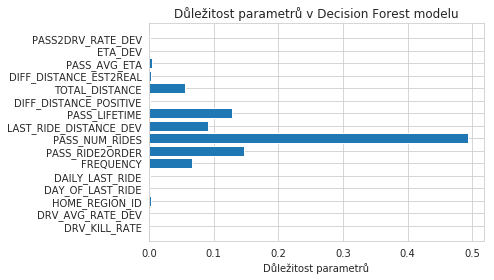

In [384]:
# Random Forest - určení váhy jednotlivých features podle důležitosti
rf_feature_importances = clf_rf.feature_importances_

# Vizualizace jednotlivých features podle důležitosti na predikci
plt.barh ( features, clf_rf.feature_importances_)
plt.xticks()
plt.xlabel('Důležitost parametrů')
plt.title('Důležitost parametrů v Decision Forest modelu')
plt.gca().invert_yaxis()

Které parametry mají nebo nemají vliv na chování zákazníka? 1. počet jízd (PASS_NUM_RIDES) s váhou blížící se 0.5 --- 2. PASS_RIDE2ORDER --- 3. jak dlouho je zákazníkem (PASS_LIFETIME) --- 4) podíl vzdalenosti poslední jízdy pasažéra ke vzdálenosti jeho průměrné jízdy (LAST_RIDE_DISTANCE_DEV). Ukazuje se, že čím více, častěji a déle s Liftagem zákazníci jezdí, tím se šance, že odejdou snižuje.Naopak se ukazuje, že den kdy se uskutečníla poslední jízda nemá vliv na odchod zákazníka, stejně jako KILL_RATE, ETA_DEV nebo PASS2DRV_RATE_DEV.


### PREDIKCE RANDOM FOREST MODELU
Malý praktický prográmek, který na základě vložených informací o poslední jízdě zákazníka predikuje, zda zákazník zůstane nebo odejde.

In [385]:
# Na základě vloženého seznamu parametrů Random Forest Model predikuje, zda zákazník zůstane nebo odejde.

# Příklad vloženého záznamu [1.00000000,0.8484763,282.86,0.97,41472,147,3, 0.72,70,0.50,0.05,0,14,9,1.004016,0.03]
while True:
    input_features = input("Prosím zadejte parametry daného zákazníka ve formě seznamu.")
    check = "[" in input_features and "]" in input_features  
    if check == True:
        features_p = input_features[1:-1].split(',')
        features_prediction = clf_rf.predict([[float(x) for x in features_p]])
        if features_prediction == [0]:
            print("Hrozí, že zákazník odejde!")
            break
        elif features_prediction == [1]:
            print("Spokojený zákazník.")
            break
    else:
        print("Špatně zadané parametry. Prosím zadejte znovu seznam s 16 parametry. ")


Prosím zadejte parametry daného zákazníka ve formě seznamu.[1.00000000,0.8484763,282.86,0.97,41472,147,3, 0.72,70,0.50,0.05,0,14,9,1.004016,0.03]
Spokojený zákazník.


## LOGISTIC REGRESSION

Pro porovnání výsledků Random Forest jsme zvolily další dva modely: logistic regression a gradient boosting.

Logistická regresi jsme zvolily, neboť se jedná o běžnou regresní metodou pro řešení binárního klasifikačního problému (odejde/neodejde zákazník).Logistická regrese popisuje a odhaduje vztah mezi jednou závislou binární proměnnou(target) a nezávislými proměnnými(features). Slabou stránkou logistické regrese je, že není schopna zvládnout velký počet proměnných. Regrese také dobře nefunuje s nezávislými proměnnými, které nejsou korelovány s cílovou proměnnou. Z těchto důvodů ji nepoužíváme jako hlavní model pro náš cíl, neboť se nehodí pro náš data set.

In [386]:
# random seed 
seed = 2019

# vytvoření Logistic Regression classifier objektu
lr = LogisticRegression(random_state=seed)

# na trénování modelu pomocí trénovacího datasetu
lr.fit(X_train, np.ravel(y_train))  # ravel - převod targetu na vektor

# předpověd targetu na základě testovacího datasetu
y_pred_lr = lr.predict(X_test)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 15.0, 'Predikovaná hodnota výsledné proměnné')

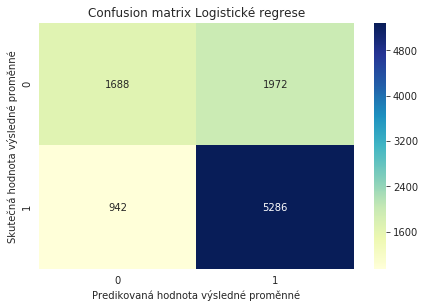

In [387]:
# Hodnocení modelu pomocí confusion matrix
cnf_matrix_lr = metrics.confusion_matrix(y_test, y_pred_lr)

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_lr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix Logistické regrese', y=1.1)
plt.ylabel('Skutečná hodnota výsledné proměnné')
plt.xlabel('Predikovaná hodnota výsledné proměnné')

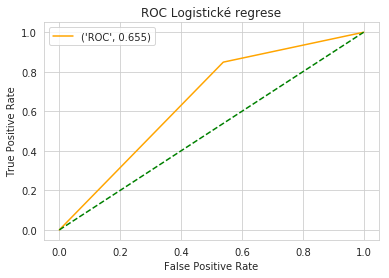

In [388]:
# Hodnocení modelu pomocí křivky ROC
roc_auc_lr = round (roc_auc_score(y_test, y_pred_lr),4)

def plot_roc_curve(fpr, tpr):   
    plt.plot(fpr, tpr, color='orange', label = ('ROC', roc_auc_lr))
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Logistické regrese')
    plt.legend()
    plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)  
plot_roc_curve(fpr, tpr)  

In [389]:
# Hodnocení modelu pomocí accuracy_score 
accuracy_score_lr = metrics.accuracy_score(y_test, y_pred_lr)

print("Accuracy score Logistické Regrese:", accuracy_score_lr)

Accuracy score Logistické Regrese: 0.705299352750809


In [390]:
# coeff_df shows contribution of individual predictors (features)
# in logistic regression the regression coefficients represent the change IN THE LOGIT for each unit change in the predictor
# for X_TEST

coeff_df = pd.DataFrame(X_test.columns.delete(0))
coeff_df.columns = ['Parametr']
coeff_df["Odhad koeficientu"] = pd.Series(lr.coef_[0])

coeff_df

,Parametr,Odhad koeficientu
0,ETA_DEV,-3.579385e-04
1,PASS_AVG_ETA,-3.893274e-04
2,DIFF_DISTANCE_EST2REAL,-1.671193e-03
3,TOTAL_DISTANCE,-2.545774e-04
4,DIFF_DISTANCE_POSITIVE,6.519715e-07
5,PASS_LIFETIME,-6.672498e-04
6,LAST_RIDE_DISTANCE_DEV,6.007251e-03
7,PASS_NUM_RIDES,2.915763e-03
8,PASS_RIDE2ORDER,3.232397e-02
9,FREQUENCY,1.404246e-03


## GRADIENT BOOSTING

Jeden z dalších klasifikačních modelů je Gradient boosting. GB vytváří predikční model ve formě souboru slabých predikčních modelů, což jsou v případě GB typicky rozhodovací stromy omezené velikosti. Boosting je technika, ve které nejsou prediktory prováděny nezávisle, ale v určitých sekvencích.

In [391]:
clf_gb = ske.GradientBoostingClassifier(n_estimators=50, random_state=seed)

# trénování GB na trénovacím data setu
clf_gb.fit(X_train, np.ravel(y_train)) # ravel -převod na vektor

# predikce nad testovacími daty
y_pred_gb = clf_gb.predict(X_test)

Text(0.5, 15.0, 'Predikovaná hodnota výsledné proměnné')

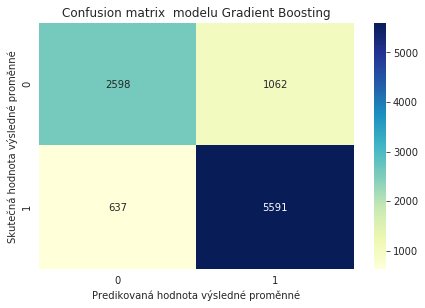

In [392]:
# Hodnocení modelu pomocí confusion matrix
cnf_matrix_gb = metrics.confusion_matrix(y_test, y_pred_gb)

class_names=[0,1] # názvy polí
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_gb), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix  modelu Gradient Boosting', y=1.1)
plt.ylabel('Skutečná hodnota výsledné proměnné')
plt.xlabel('Predikovaná hodnota výsledné proměnné')

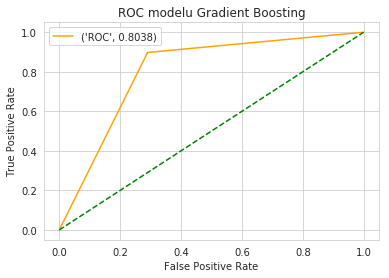

In [393]:
# Hodnocení modelu pomocí ROC = Receiver operating characteristic 
roc_auc_gb = round (roc_auc_score(y_test, y_pred_gb),4)

def plot_roc_curve(fpr, tpr):   
    plt.plot(fpr, tpr, color='orange', label = ('ROC', roc_auc_gb))
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC modelu Gradient Boosting')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)  
plot_roc_curve(fpr, tpr)

In [394]:
# Hodnocení pomocí accuracy_score 

accuracy_score_gb = metrics.accuracy_score(y_test, y_pred_gb)

print ('Gradient Boosting accuracy score:', accuracy_score_gb)


Gradient Boosting accuracy score: 0.8281755663430421


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

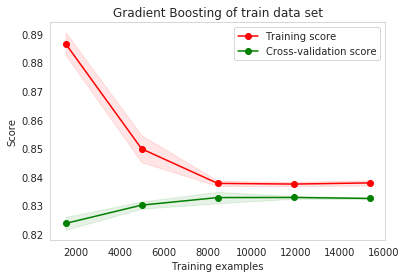

In [395]:
# graf zachycující proces učení (trénování) modelu GB na trénovacích datech
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

clf_gb_plot = ske.GradientBoostingClassifier(n_estimators=50, random_state=seed)
plot_learning_curve(clf_gb, 'Gradient Boosting of train data set', X_train, np.ravel(y_train) )

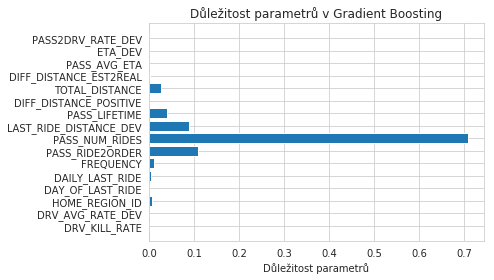

In [396]:
# Graph významnosti jednotlivých features

plt.barh ( features, clf_gb.feature_importances_)
plt.xticks()
plt.xlabel('Důležitost parametrů')
plt.title('Důležitost parametrů v Gradient Boosting')
plt.gca().invert_yaxis()

## POROVNÁNÍ JEDNOTLIVÝCH MODELŮ

U iterativních algoritmů můžeme sledovat jak se mění chyba modelu v čase a porovnávat tuto chybu na trénovací a testovací množině. To nám umožní porozumět lépe učení a pomocí parametru modelu toto učení zlepšit. Např. pokud je chyba na trénovacích i testovacích datech velká, je model nedoučen. Pokud je naopak chyba na trénovacích datech malá a na testovacích velká, je model přetrénovaný. Pomocí grafu pak můžeme vybrat okamžik učení modelu, kdy je jeho naučení optimální. 

Dle accuracy score vychází nejlépe Gradient Boosting s 0,8281 a těsně za ním je Random Forest s upravenými parametry a skóre 0,8117. Z confusion matrix vychází o něco lépe také Gradient Boosting, avšak Gradient boosting algoritmu jsme v rámci trénování neupravovaly parametry, takže je zde riziko, že je model přetrénovaný. Každopádně, do budoucna by bylo určitě zajímavé se tímto modelem více zabývat. Model logistické regrese naopak vůbec neobstál a vrací nízké hodnot jak accuracy score, tak confusion matrix i ROC. Po zhodnocení rizik a výhod jednotlivých modelů jsme se rozhodly pro RANDOM FOREST a predikovat odchodovost zákazníků právě na tomto modelu.

In [397]:
print ("Decision Tree accuracy score:", accuracy_score_dt)
print ("Random Forest acccuracy score:", accuracy_score_rf)
print ("Logistic Regression accuracy score:", accuracy_score_lr)
print ("Gradient Boosting accuracy score:", accuracy_score_gb)


Decision Tree accuracy score: 0.7769012944983819
Random Forest acccuracy score: 0.811792071197411
Logistic Regression accuracy score: 0.705299352750809
Gradient Boosting accuracy score: 0.8281755663430421


Text(0.5, 15.0, 'Predikovaný target')

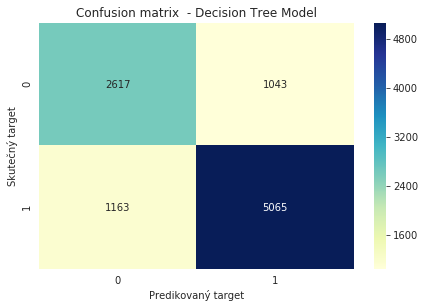

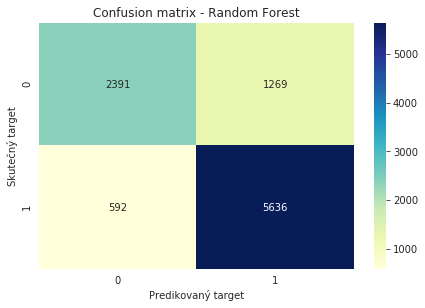

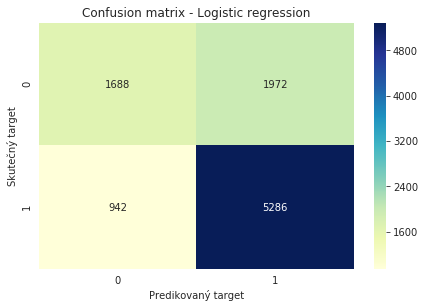

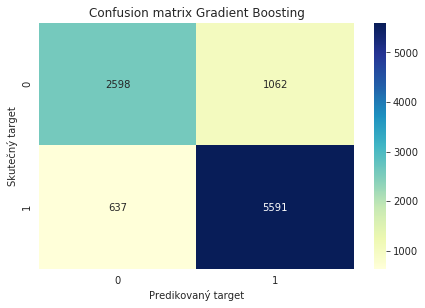

In [398]:
# DECISION TREE
class_names=[0,1] # názvy polí
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_dt), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix  - Decision Tree Model', y=1.1)
plt.ylabel('Skutečný target')
plt.xlabel('Predikovaný target')

# RANDOM FOREST
class_names=[0,1] # názvy polí
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix - Random Forest', y=1.1)
plt.ylabel('Skutečný target')
plt.xlabel('Predikovaný target')


# LOGISTIC REGRESSION
class_names=[0,1] # názvy polí
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_lr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix - Logistic regression', y=1.1)
plt.ylabel('Skutečný target')
plt.xlabel('Predikovaný target')

# GRADIENT BOOSTING
class_names=[0,1] # názvy polí
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_gb), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix Gradient Boosting', y=1.1)
plt.ylabel('Skutečný target')
plt.xlabel('Predikovaný target')

Zaměřme se na jednotlivé parametry indikující odchod zákazníka. Na začátku jsme měly tyto hypotézy:
Mezi indikátory, které mohou signalizovat odchod zákazníka, patří:
- špatné hodnocení poslední jízdy
- zkoršené hodnocení posledních jízd / proti průměru zákazníka
- jízda s řidičem s vysokou kill-rate

Špatné hodnocení poslední jízdy (PASS2DRV_RATE) jsme testovaly v rámci analýzy vstupních parametrů a na základě grafu rozhodly, že má zanedbatelný vliv. Na zbylé hypotézy jsme si odpověděly na základě našich nejúspěšnějších modelů Random Forest a Gradient Boosting. Oba dva vyhodnotily zhoršené hodnocení poslední jízdy oproti průměrnému hodnocení zákazníka (PASS2DRV_RATE_DEV) a jízdu s řidičem s vysokým kill_rate (DRV_KILL_RATE) jako nepodstatné indikátory signalizující odchod zákazníka.

Výše stanovené hypotézy se nám nepotvrdily, ale predikční modely ukázaly, že největší váhu mají tyto parametry:
- celkový počet jízd zákazníka (s počtem jízd stoupá loajalita zákazníka)
- jak dlouho je zákazníkem Liftaga
- poměr uskutečněných jízd k počtu objednávek
- poměr vzdálenosti poslední jízdy k průměrné vzdálenosti všech jízd zákazníka
- frekvence s jakou zákazník jezdí

0.0 PASS2DRV_RATE_DEV
0.0 ETA_DEV
0.0 PASS_AVG_ETA
0.003 DIFF_DISTANCE_EST2REAL
0.027 TOTAL_DISTANCE
0.0 DIFF_DISTANCE_POSITIVE
0.039 PASS_LIFETIME
0.088 LAST_RIDE_DISTANCE_DEV
0.707 PASS_NUM_RIDES
0.109 PASS_RIDE2ORDER
0.013 FREQUENCY
0.005 DAILY_LAST_RIDE
0.0 DAY_OF_LAST_RIDE
0.007 HOME_REGION_ID
0.0 DRV_AVG_RATE_DEV
0.0 DRV_KILL_RATE


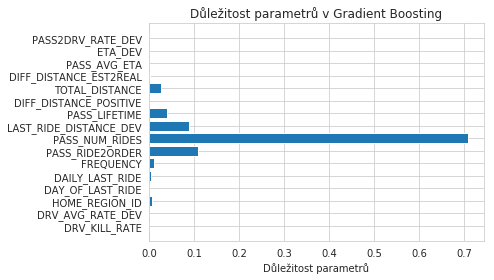

In [399]:
plt.barh ( features, clf_gb.feature_importances_)
plt.xticks()
plt.xlabel('Důležitost parametrů')
plt.title('Důležitost parametrů v Gradient Boosting')
[print(round (clf_gb.feature_importances_[i],3), features[i]) for i in range(0,len(features))]
plt.gca().invert_yaxis()

0.001 PASS2DRV_RATE_DEV
0.001 ETA_DEV
0.004 PASS_AVG_ETA
0.003 DIFF_DISTANCE_EST2REAL
0.056 TOTAL_DISTANCE
0.001 DIFF_DISTANCE_POSITIVE
0.129 PASS_LIFETIME
0.091 LAST_RIDE_DISTANCE_DEV
0.493 PASS_NUM_RIDES
0.148 PASS_RIDE2ORDER
0.067 FREQUENCY
0.002 DAILY_LAST_RIDE
0.0 DAY_OF_LAST_RIDE
0.004 HOME_REGION_ID
0.0 DRV_AVG_RATE_DEV
0.0 DRV_KILL_RATE


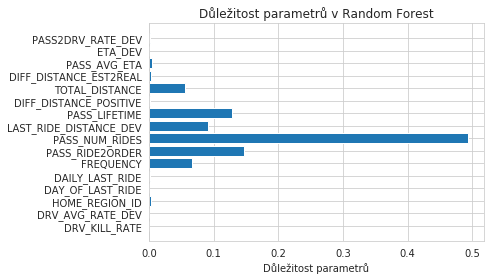

In [400]:
plt.barh ( features, clf_rf.feature_importances_)
plt.xticks()
[print(round (clf_rf.feature_importances_[i],3), features[i]) for i in range(0,len(features))]
plt.xlabel('Důležitost parametrů')
plt.title('Důležitost parametrů v Random Forest')
plt.gca().invert_yaxis()